## Introduction

In this project a baker wants to amplify his bakery chains in a different neighborhood Brooklyn, which has already chains in Manhattan in New York. He should choose the best place to have high income and grow his business. Therefore, in this project this issue is aimed to be solved with the best solution by using some data science methodologies.

## Data
Population of each borough is gathered by using web scraping method from a website. It has been searched in web and only the population of main thirty six neighborhoods in Brooklyn is found. In addition, by using Geocoder Python package, latitude and longitude data of each neighborhood is retrieved. Also, to get venues and venue categories of each neighborhood Forsquare API is used. Moreover, to create a map of neighborhoods by using latitude and longitude values, Folium package is used.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#item1">Explore Boroughs and Neighborhoods in New York City</a>

2.  <a href="#item2">Explore Neighborhoods and Population in Brooklyn</a>

3.  <a href="#item3">Explore Venues in Neighborhoods of Brooklyn</a>

4.  <a href="#item4">One Hot Encoding To Examine Each Neighborhood by Venues</a>

5.  <a href="#item5">Cluster Neighborhoods</a> 
    
6.  <a href="#item6">Examine Clusters</a> 

7.  <a href="#item7">Result And Discussion</a>

8.  <a href="#item8">Conclusion</a>
    </font>
    </div>


Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [183]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

import pandas as pd
import seaborn as sns
from matplotlib import pyplot
print('Libraries imported.')

Libraries imported.


<a id='item1'></a>


## 1. Explore Boroughs and Neighborhoods in New York City


Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 


#### Load and explore the data


In [184]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.


In [186]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Get neighborhoods with _features_ key, which is basically a list of the neighborhoods of NewYork

In [188]:
neighborhoods_data = newyork_data['features']

#### Tranform the data into a _pandas_ dataframe


In [189]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Fill the dataframe one row at a time.


In [190]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.


In [191]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.


In [192]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.


In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.


In [193]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.


In [121]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## 2.Explore Neighborhoods and Population in Brooklyn

Slice the original dataframe and create a new dataframe of the Brooklyn data.


In [194]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471
5,Brooklyn,Brighton Beach,40.576825,-73.965094
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438
8,Brooklyn,Flatbush,40.636326,-73.958401
9,Brooklyn,Crown Heights,40.670829,-73.943291


In [195]:
brooklyn_data.shape

(70, 4)

Get the geographical coordinates of Brooklyn.


In [203]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


Visualize Brooklyn the neighborhoods in it.

In [204]:
# create map of Brooklyn using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

#### Get Brooklyn's major neighborhoods' population

In [222]:
url = 'https://www.worldatlas.com/articles/brooklyn-neighborhoods-by-population.html'
brooklyn_pop = pd.read_html(url, header=0)[0]
dataTypeDict = dict(brooklyn_pop.dtypes)
dataTypeDict

{'Rank': dtype('int64'),
 '\ufeffNeighborhood': dtype('O'),
 'Population': dtype('int64')}

In [223]:
brooklyn_pop.rename(columns={'\ufeffNeighborhood':'Neighborhood'}, inplace = True)
brooklyn_pop['Neighborhood'].replace({'DUMBO': 'Dumbo', 'Downtown Brooklyn': 'Downtown', 
                                      'Bedford-Stuyvesant': 'Bedford Stuyvesant'}, inplace=True)
brooklyn_pop

,Rank,Neighborhood,Population
0,1,Bedford Stuyvesant,157530
1,2,Bensonhurst,151705
2,3,Bushwick,129239
3,4,Sunset Park,126000
4,5,Borough Park,106357
5,6,Flatbush,105804
6,7,Prospect Lefferts Gardens,99287
7,8,East New York,91958
8,9,Crown Heights,85886
9,10,Canarsie,83693


In [75]:
population_plot=brooklyn_common.sort_values(by=['Population'], ascending=False)
population_plot

,Borough,Neighborhood,Latitude,Longitude,Population
14,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,157530
1,Brooklyn,Bensonhurst,40.611009,-73.995180,151705
13,Brooklyn,Bushwick,40.698116,-73.925258,129239
2,Brooklyn,Sunset Park,40.645103,-74.010316,126000
24,Brooklyn,Borough Park,40.633131,-73.990498,106357
6,Brooklyn,Flatbush,40.636326,-73.958401,105804
31,Brooklyn,Prospect Lefferts Gardens,40.658420,-73.954899,99287
21,Brooklyn,East New York,40.669926,-73.880699,91958
7,Brooklyn,Crown Heights,40.670829,-73.943291,85886
22,Brooklyn,Canarsie,40.635564,-73.902093,83693


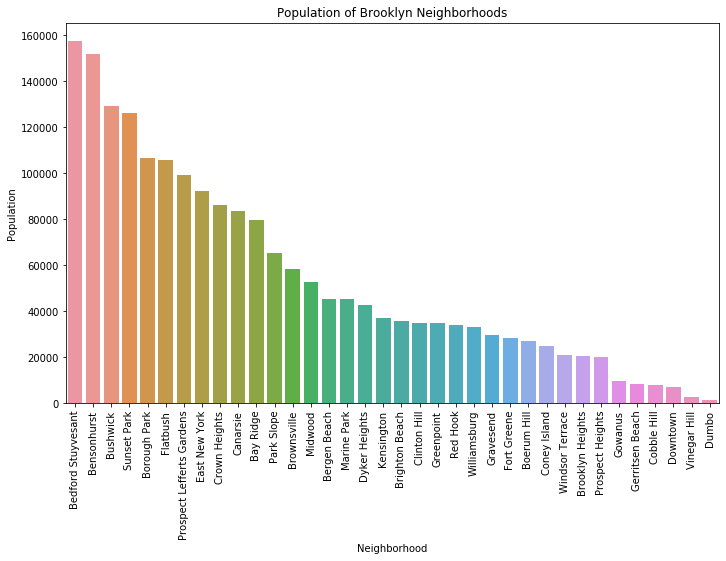

In [148]:

fig, ax = pyplot.subplots(figsize=(11.7, 7))
plot=sns.barplot(ax=ax, x="Neighborhood",y=population_plot.Population ,data=population_plot);
for item in plot.get_xticklabels():
    item.set_rotation(90)
plot.set_title("Population of Brooklyn Neighborhoods");

Merge population of  major neighborhoods data with neighborhoods of Brooklyn to get latitude and longitude values of each neighborhoods

In [221]:
brooklyn_common=pd.merge(brooklyn_data, brooklyn_pop, how='inner')
brooklyn_common.drop('Rank', axis='columns', inplace=True)
brooklyn_common

,Borough,Neighborhood,Latitude,Longitude,Population
0,Brooklyn,Bay Ridge,40.625801,-74.030621,79371
1,Brooklyn,Bensonhurst,40.611009,-73.995180,151705
2,Brooklyn,Sunset Park,40.645103,-74.010316,126000
3,Brooklyn,Greenpoint,40.730201,-73.954241,34719
4,Brooklyn,Gravesend,40.595260,-73.973471,29436
5,Brooklyn,Brighton Beach,40.576825,-73.965094,35547
6,Brooklyn,Flatbush,40.636326,-73.958401,105804
7,Brooklyn,Crown Heights,40.670829,-73.943291,85886
8,Brooklyn,Kensington,40.642382,-73.980421,36891
9,Brooklyn,Windsor Terrace,40.656946,-73.980073,20988


Start utilizing the Foursquare API to explore the neighborhoods and segment them.


#### Define Foursquare Credentials and Version


In [205]:
CLIENT_ID = 'CVF3YRAGAJAXHQFWPXXTURSHCQDJAIBHTDU35FMQ4UKVOIMO' # your Foursquare ID
CLIENT_SECRET = 'IM3LSGVKEI10UNFGBVE3OJIIZO5EL1A3S5V5DLTGUPO2OW1J' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CVF3YRAGAJAXHQFWPXXTURSHCQDJAIBHTDU35FMQ4UKVOIMO
CLIENT_SECRET:IM3LSGVKEI10UNFGBVE3OJIIZO5EL1A3S5V5DLTGUPO2OW1J


<a id='item2'></a>


## 3. Explore Venues in Neighborhoods of Brooklyn

#### Create a function to repeat the same process to all the neighborhoods in Brooklyn

In [208]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called _manhattan_venues_.


In [209]:
# type your answer here
brooklyn_venues=getNearbyVenues(names= brooklyn_data['Neighborhood'], latitudes=brooklyn_data['Latitude'], longitudes=brooklyn_data['Longitude'])

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


Double-click **here** for the solution.

<!-- The correct answer is:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )
--> 


#### Check the size of the resulting dataframe


In [211]:
print(brooklyn_venues.shape)
brooklyn_venues.head(10)

(2710, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Leo's Casa Calamari,40.624200,-74.030931,Pizza Place
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Georgian Dream Cafe and Bakery,40.625586,-74.030196,Caucasian Restaurant
5,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
6,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place
7,Bay Ridge,40.625801,-74.030621,The Bookmark Shoppe,40.624577,-74.030562,Bookstore
8,Bay Ridge,40.625801,-74.030621,Mimi Nails,40.622571,-74.031477,Spa
9,Bay Ridge,40.625801,-74.030621,A.L.C. Italian Grocery,40.623051,-74.031224,Grocery Store


Check how many venues were returned for each neighborhood


In [224]:
grouped_venues=brooklyn_venues.groupby('Neighborhood').count()
grouped_venues.shape

(70, 6)

#### Find out how many unique categories can be curated from all the returned venues


In [139]:
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 293 uniques categories.


<a id='item3'></a>


## 4. One Hot Encoding To Examine Each Neighborhood by Venues


In [225]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
col = brooklyn_onehot['Neighborhood']
brooklyn_onehot.drop(labels=['Neighborhood'], axis=1, inplace = True)
brooklyn_onehot.insert(0, 'Neighborhood', col)
brooklyn_onehot

brooklyn_onehot.head(15)

,Neighborhood,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Gym,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki B

And let's examine the new dataframe size.


In [226]:
brooklyn_onehot.shape

(2710, 293)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [142]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Gym,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan 

#### Confirm the new size


In [227]:
brooklyn_grouped.shape

(70, 293)

#### 4. Find Best Neighborhoods To Start A New Bakery

#### Sort bakery venues from grouped data

In [228]:
bakery = brooklyn_grouped[["Neighborhood","Bakery"]]
bakery=bakery.sort_values(by=['Bakery'],ascending=False)
bakery

,Neighborhood,Bakery
36,Gravesend,0.130435
18,Crown Heights,0.086957
45,Midwood,0.083333
64,Sunset Park,0.083333
50,Ocean Hill,0.074074
26,East Williamsburg,0.065574
55,Prospect Lefferts Gardens,0.060000
13,Carroll Gardens,0.050000
14,City Line,0.048780
22,Dumbo,0.047619


#### Plot neighborhoods that have bakery frequencies

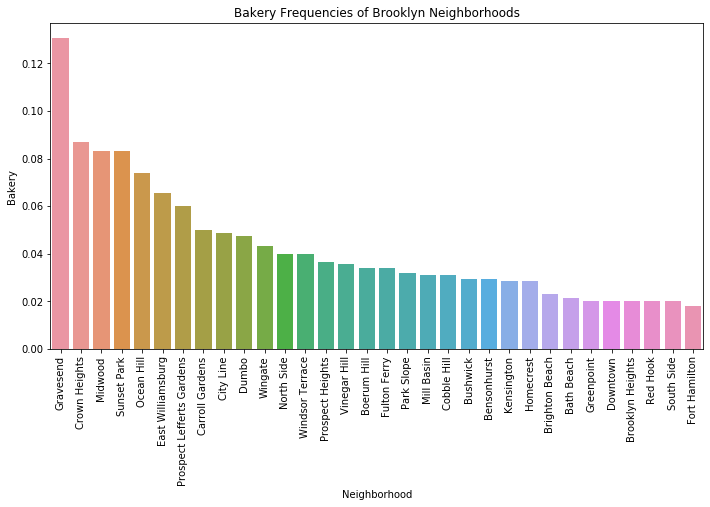

In [229]:
bakery_plot=bakery[bakery['Bakery']!=0]
fig, ax = pyplot.subplots(figsize=(11.7, 6))
plot=sns.barplot(ax=ax, x="Neighborhood",y=bakery_plot.Bakery ,data=bakery_plot);
for item in plot.get_xticklabels():
    item.set_rotation(90)
plot.set_title("Bakery Frequencies of Brooklyn Neighborhoods");

#### List neighborhoods that have not bakery venue

In [218]:
no_bakery=bakery[bakery['Bakery']==0]
no_bakery

,Neighborhood,Bakery
52,Paerdegat Basin,0.0
10,Brownsville,0.0
8,Broadway Junction,0.0
56,Prospect Park South,0.0
58,Remsen Village,0.0
59,Rugby,0.0
25,East New York,0.0
60,Sea Gate,0.0
12,Canarsie,0.0
61,Sheepshead Bay,0.0


#### Merge population data and neighborhoods have not bakery venue to find best neighborhoods

In [149]:
best_places=pd.merge(no_bakery, brooklyn_common, how='inner')
col = best_places['Population']
best_places.drop(labels=['Population'], axis=1, inplace = True)
best_places.insert(1, 'Population', col)
best_places.rename(columns={'Bakery':'Bakery Frequency'}, inplace = True)
best_places.sort_values(by=['Population'], ascending=False, inplace=True)
best_places

,Neighborhood,Population,Bakery Frequency,Borough,Latitude,Longitude
6,Bedford Stuyvesant,157530,0.0,Brooklyn,40.687232,-73.941785
3,Borough Park,106357,0.0,Brooklyn,40.633131,-73.990498
8,Flatbush,105804,0.0,Brooklyn,40.636326,-73.958401
1,East New York,91958,0.0,Brooklyn,40.669926,-73.880699
2,Canarsie,83693,0.0,Brooklyn,40.635564,-73.902093
11,Bay Ridge,79371,0.0,Brooklyn,40.625801,-74.030621
0,Brownsville,58300,0.0,Brooklyn,40.663950,-73.910235
4,Bergen Beach,45231,0.0,Brooklyn,40.615150,-73.898556
13,Marine Park,45231,0.0,Brooklyn,40.609748,-73.931344
12,Dyker Heights,42419,0.0,Brooklyn,40.619219,-74.019314


## 5. Cluster Neighborhoods


Create the new dataframe and display the top 10 venues for each neighborhood.


In [230]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(50)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Chinese Restaurant,Pizza Place,Fast Food Restaurant,Bubble Tea Shop,Gas Station,Donut Shop,Italian Restaurant,Pharmacy,Cantonese Restaurant,Surf Spot
1,Bay Ridge,Spa,Italian Restaurant,Pizza Place,Greek Restaurant,American Restaurant,Bar,Bagel Shop,Playground,New American Restaurant,Sushi Restaurant
2,Bedford Stuyvesant,Coffee Shop,Bar,Pizza Place,Café,Boutique,Bus Station,Bus Stop,Deli / Bodega,New American Restaurant,Fried Chicken Joint
3,Bensonhurst,Chinese Restaurant,Italian Restaurant,Pizza Place,Ice Cream Shop,Donut Shop,Sushi Restaurant,Hotpot Restaurant,Dessert Shop,Sporting Goods Shop,Smoke Shop
4,Bergen Beach,Park,Harbor / Marina,Baseball Field,Playground,Athletics & Sports,Farmers Market,Event Service,Event Space,Factory,Falafel Restaurant
5,Boerum Hill,Coffee Shop,Dance Studio,Bar,Bakery,Furniture / Home Store,French Restaurant,Arts & Crafts Store,Sandwich Place,Yoga Studio,Gym / Fitness Center
6,Borough Park,Bank,Pizza Place,Pharmacy,Fast Food Restaurant,Hotel,Grocery Store,Coffee Shop,Restaurant,Chinese Restaurant,Café
7,Brighton Beach,Eastern European Restaurant,Russian Restaurant,Restaurant,Gourmet Shop,Sushi Restaurant,Beach,Bank,Pharmacy,Mobile Phone Shop,Playground
8,Broadway Junction,Donut Shop,Metro Station,Bus Stop,Gas Station,Sandwich Place,Caribbean Restaurant,Breakfast Spot,Burger Joint,Nightclub,Fried Chicken Joint
9,Brooklyn Heights,Deli / Bodega,Yoga Studio,Bar,Pizza Place,Pharmacy,Coffee Shop,Park,Cosmetics Shop,Italian Restaurant,Gym


<a id='item4'></a>


Run _k_-means to cluster the neighborhood into 8 clusters.


In [165]:
# set number of clusters
kclusters =8

brooklyn_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 3, 3, 1, 6, 3, 4, 3, 4, 3])

In [231]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#neighborhoods_venues_sorted.drop('Cluster Labels', inplace=True, axis=1)
brooklyn_merged = brooklyn_data

# merge data to add latitude/longitude for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,3,Spa,Italian Restaurant,Pizza Place,Greek Restaurant,American Restaurant,Bar,Bagel Shop,Playground,New American Restaurant,Sushi Restaurant
1,Brooklyn,Bensonhurst,40.611009,-73.995180,1,Chinese Restaurant,Italian Restaurant,Pizza Place,Ice Cream Shop,Donut Shop,Sushi Restaurant,Hotpot Restaurant,Dessert Shop,Sporting Goods Shop,Smoke Shop
2,Brooklyn,Sunset Park,40.645103,-74.010316,4,Latin American Restaurant,Bank,Bakery,Mexican Restaurant,Pizza Place,Deli / Bodega,Mobile Phone Shop,Fried Chicken Joint,Gym,Pharmacy
3,Brooklyn,Greenpoint,40.730201,-73.954241,3,Bar,Pizza Place,Coffee Shop,Cocktail Bar,Grocery Store,Furniture / Home Store,French Restaurant,Mexican Restaurant,Deli / Bodega,Record Shop
4,Brooklyn,Gravesend,40.595260,-73.973471,3,Lounge,Pizza Place,Bakery,Deli / Bodega,Italian Restaurant,Bar,Chinese Restaurant,Martial Arts School,Gourmet Shop,Donut Shop


Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


 Visualize the resulting clusters


In [169]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>


## 6. Examine Clusters


#### Cluster 1
     Deli, Fried Chicken, Restaurant 

In [171]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Brownsville,Fried Chicken Joint,Chinese Restaurant,Playground,Performing Arts Venue,Plaza,Moving Target,Burger Joint,Farmers Market,Restaurant,Park
26,East New York,Deli / Bodega,Fried Chicken Joint,Plaza,Fast Food Restaurant,Pizza Place,Event Service,Convenience Store,Home Service,Flea Market,Fish Market
43,Ocean Hill,Deli / Bodega,Fried Chicken Joint,Bus Stop,Southern / Soul Food Restaurant,Grocery Store,Chinese Restaurant,Bakery,Supermarket,Donut Shop,Check Cashing Service
58,New Lots,Grocery Store,Pizza Place,Fried Chicken Joint,Chinese Restaurant,Art Gallery,Bank,Metro Station,Park,Pet Store,Asian Restaurant
67,Highland Park,Deli / Bodega,Latin American Restaurant,Fried Chicken Joint,Garden,Furniture / Home Store,Park,Grocery Store,Metro Station,Tennis Court,Gym / Fitness Center


#### Cluster 2
     Restaurant, Pizza, Bakery, Coffee Shops, Cafe

In [172]:
cluster_2=brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]
cluster_2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bensonhurst,Chinese Restaurant,Italian Restaurant,Pizza Place,Ice Cream Shop,Donut Shop,Sushi Restaurant,Hotpot Restaurant,Dessert Shop,Sporting Goods Shop,Smoke Shop
7,Manhattan Terrace,Pizza Place,Ice Cream Shop,Donut Shop,Bus Station,Organic Grocery,Sushi Restaurant,Steakhouse,Bank,Bagel Shop,Gourmet Shop
9,Crown Heights,Pizza Place,Museum,Bakery,Café,Supermarket,Kosher Restaurant,Liquor Store,Candy Store,Bank,Bagel Shop
31,Manhattan Beach,Café,Sandwich Place,Harbor / Marina,Bus Stop,Beach,Food,Ice Cream Shop,Playground,Dessert Shop,Fast Food Restaurant
37,Marine Park,Deli / Bodega,Coffee Shop,Liquor Store,Chinese Restaurant,Gym,Park,Athletics & Sports,Basketball Court,Baseball Field,Pizza Place
46,Midwood,Pizza Place,Bakery,Convenience Store,Bagel Shop,Field,Video Game Store,Pharmacy,Ice Cream Shop,Candy Store,Flea Market
52,Ocean Parkway,Pizza Place,Playground,Gym,Steakhouse,Bus Station,Bus Stop,Sushi Restaurant,General Entertainment,Kitchen Supply Store,Bagel Shop
60,Mill Basin,Chinese Restaurant,Grocery Store,Japanese Restaurant,Pizza Place,Bank,Bagel Shop,Liquor Store,Frozen Yogurt Shop,Food Truck,Donut Shop
68,Madison,Bagel Shop,Spa,Pizza Place,Italian Restaurant,Dessert Shop,Pilates Studio,Restaurant,Candy Store,Hobby Shop,Deli / Bodega


#### Cluster 3
Food, Auto Garage, MArina

In [173]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,Paerdegat Basin,Food,Auto Garage,Harbor / Marina,Asian Restaurant,Bus Line,Yoga Studio,Fast Food Restaurant,Factory,Falafel Restaurant,Farm


#### Cluster 4
     Spa, Bar, Restaurant, Park, Bakery, Coffee shops

In [174]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Spa,Italian Restaurant,Pizza Place,Greek Restaurant,American Restaurant,Bar,Bagel Shop,Playground,New American Restaurant,Sushi Restaurant
3,Greenpoint,Bar,Pizza Place,Coffee Shop,Cocktail Bar,Grocery Store,Furniture / Home Store,French Restaurant,Mexican Restaurant,Deli / Bodega,Record Shop
4,Gravesend,Lounge,Pizza Place,Bakery,Deli / Bodega,Italian Restaurant,Bar,Chinese Restaurant,Martial Arts School,Gourmet Shop,Donut Shop
5,Brighton Beach,Eastern European Restaurant,Russian Restaurant,Restaurant,Gourmet Shop,Sushi Restaurant,Beach,Bank,Pharmacy,Mobile Phone Shop,Playground
6,Sheepshead Bay,Turkish Restaurant,Dessert Shop,Harbor / Marina,Yoga Studio,Creperie,Diner,Outlet Store,Restaurant,Russian Restaurant,Sandwich Place
11,Kensington,Grocery Store,Thai Restaurant,Ice Cream Shop,Pizza Place,Donut Shop,Furniture / Home Store,Liquor Store,Supermarket,Sandwich Place,Pharmacy
12,Windsor Terrace,Plaza,Grocery Store,Diner,Park,Deli / Bodega,Sushi Restaurant,Chinese Restaurant,Salad Place,Bar,Bakery
13,Prospect Heights,Bar,Mexican Restaurant,Wine Shop,Coffee Shop,Restaurant,Bakery,Cocktail Bar,Thai Restaurant,Diner,New American Restaurant
15,Williamsburg,Pizza Place,Coffee Shop,Bagel Shop,Yoga Studio,Deli / Bodega,Bar,Breakfast Spot,Clothing Store,Sandwich Place,Taco Place
16,Bushwick,Bar,Deli / Bodega,Mexican Restaurant,Coffee Shop,Discount Store,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Café,Pizza Place,Bakery


#### Cluster 5
Bank, Restaurant, Coffee Shop, Bakery, Pharmacy

In [175]:
cluster_5=brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]
cluster_5

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Sunset Park,Latin American Restaurant,Bank,Bakery,Mexican Restaurant,Pizza Place,Deli / Bodega,Mobile Phone Shop,Fried Chicken Joint,Gym,Pharmacy
8,Flatbush,Coffee Shop,Caribbean Restaurant,Deli / Bodega,Plaza,Sandwich Place,Liquor Store,Lounge,Bank,Bagel Shop,Juice Bar
10,East Flatbush,Chinese Restaurant,ATM,Moving Target,Department Store,Wine Shop,Liquor Store,Supermarket,Caribbean Restaurant,Pharmacy,Fast Food Restaurant
25,Cypress Hills,Pizza Place,Ice Cream Shop,Metro Station,Fried Chicken Joint,Dance Studio,Chinese Restaurant,South American Restaurant,Mobile Phone Shop,Spanish Restaurant,Fast Food Restaurant
27,Starrett City,Moving Target,Pizza Place,Caribbean Restaurant,American Restaurant,Bus Stop,Convenience Store,Discount Store,Pharmacy,Supermarket,Bus Station
28,Canarsie,Thai Restaurant,Caribbean Restaurant,Deli / Bodega,Grocery Store,Gym,Bus Line,Asian Restaurant,Farm,Event Service,Event Space
29,Flatlands,Pharmacy,Caribbean Restaurant,Fried Chicken Joint,Fast Food Restaurant,Nightclub,Chinese Restaurant,Bar,Lounge,Discount Store,Video Store
33,Bath Beach,Chinese Restaurant,Pizza Place,Fast Food Restaurant,Bubble Tea Shop,Gas Station,Donut Shop,Italian Restaurant,Pharmacy,Cantonese Restaurant,Surf Spot
34,Borough Park,Bank,Pizza Place,Pharmacy,Fast Food Restaurant,Hotel,Grocery Store,Coffee Shop,Restaurant,Chinese Restaurant,Café
44,City Line,Donut Shop,Pharmacy,Fried Chicken Joint,Pizza Place,Cosmetics Shop,Bakery,Grocery Store,Fast Food Restaurant,Food,Spanish Restaurant


#### Cluster 6
Dance Studio, Bagel, Plaza

In [177]:
cluster_6=brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 5, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]
cluster_6

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Dyker Heights,Dance Studio,Bagel Shop,Plaza,Burger Joint,Golf Course,Yoga Studio,Fast Food Restaurant,Event Space,Factory,Falafel Restaurant


#### Cluster 7
Park, Marina, Sports

In [178]:
cluster_7=brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 6, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]
cluster_7

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,Bergen Beach,Park,Harbor / Marina,Baseball Field,Playground,Athletics & Sports,Farmers Market,Event Service,Event Space,Factory,Falafel Restaurant


#### Cluster 8
Pool, Yoga, Fast Food

In [179]:
cluster_8=brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 7, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]
cluster_8

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Mill Island,Pool,Yoga Studio,Fast Food Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Field


## 7.Results and Discussion

#### When each cluster is examined, neighborhoods in Cluster 1 in red color, Cluster 3 in blue color, Cluster 6 in light green color, Cluster 7 in yellow color, and Cluster 8 in orange color are most appropriate places to start a new bakery.

#### When two results are examined, the neighborhoods which are;
#### •	Ocean Hill
#### •	New Lots
#### •	Highland Park
#### •	Paerdegat Basin
#### •	Mill Island
#### can be added to best places list. However, population data could not be found for these neighborhoods. In the end, 21 neighborhoods could be the most appropriate neighborhoods to start a new bakery for the owner.


### The Best Neighborhoods to Start A New Bakery in Brooklyn
#### 1.Bedford Stuyvesant	
#### 2.Borough Park	
#### 3.Flatbush	
#### 4.East New York
#### 5.Canarsie	
#### 6.Bay Ridge	
#### 7.Brownsville	
#### 8.Bergen Beach	
#### 9.Marine Park	
#### 10.Dyker Heights	
#### 11.Clinton Hill	
#### 12.Williamsburg	
#### 13.Fort Greene	
#### 14.Coney Island	
#### 15.Gowanus	
#### 16.Gerritsen Beach	
#### 17.Ocean Hill	
#### 18.New Lots	
#### 19.Highland Park	
#### 20.Paerdegat Basin	
#### 21.Mill Island	


In this project, best neighborhoods to start a bakery are determined. However, it is not implied that these are actually optimal places. The information about neighborhoods is provided to bakers who want to start a new bakery in a neighborhood that the owner does not have enough information. While examining the population of neighborhoods in Brooklyn, only the 36 main crowded neighborhoods are analyzed. Because the population of all neighborhoods could not be reached. For the future projects, population of all neighborhoods could be evaluated for starting a new bakery. Moreover, best neighborhoods can be suggested for another starting business fields and also after determining city center, potential zones for starting a business can be suggested with respect to their distances to the center.

## 8. Conclusion
Aim of this project was to suggest optimal neighborhoods to start a new bakery in Brooklyn. To achieve this goal, two criteria are taken care of which are population and the frequency of bakeries in that neighborhood. If a neighborhood that is the most populous and has the least number of bakery could be an optimal place to start this business. After gathering population data of 36 main neighborhoods, the venue types are found for each neighborhood and bakery frequencies are discovered. Then by merging two data, 16 optimal places are revealed. In addition, to have more options of optimal neighborhoods, K-Means Clustering is used. By using this analyze, 10 most common venues are found for each neighborhood and they are clustered. The clusters that does not have bakery venues in 10 most common venues are chosen as optimal neighborhoods. And five more neighborhoods are added to the optimal neighborhoods list. As a result 21 neighborhoods are revealed as optimal places to start a new bakery business.